<Body>   
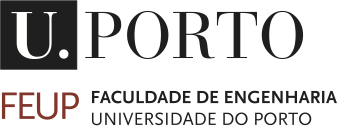   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [1]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'name_of_the_file.ipynb' matched no files


# **Identification**

* **Group:** xx
* **Name:** José Canha
* **Student Number:** up201806121

* **Name:**
* **Student Number:**

* **Name:** Pedro Moromizato
* **Student Number:** up201902373

---




# An Autonomous Underwater Vehicle (UAV) model in the vertical plan


<Body>   
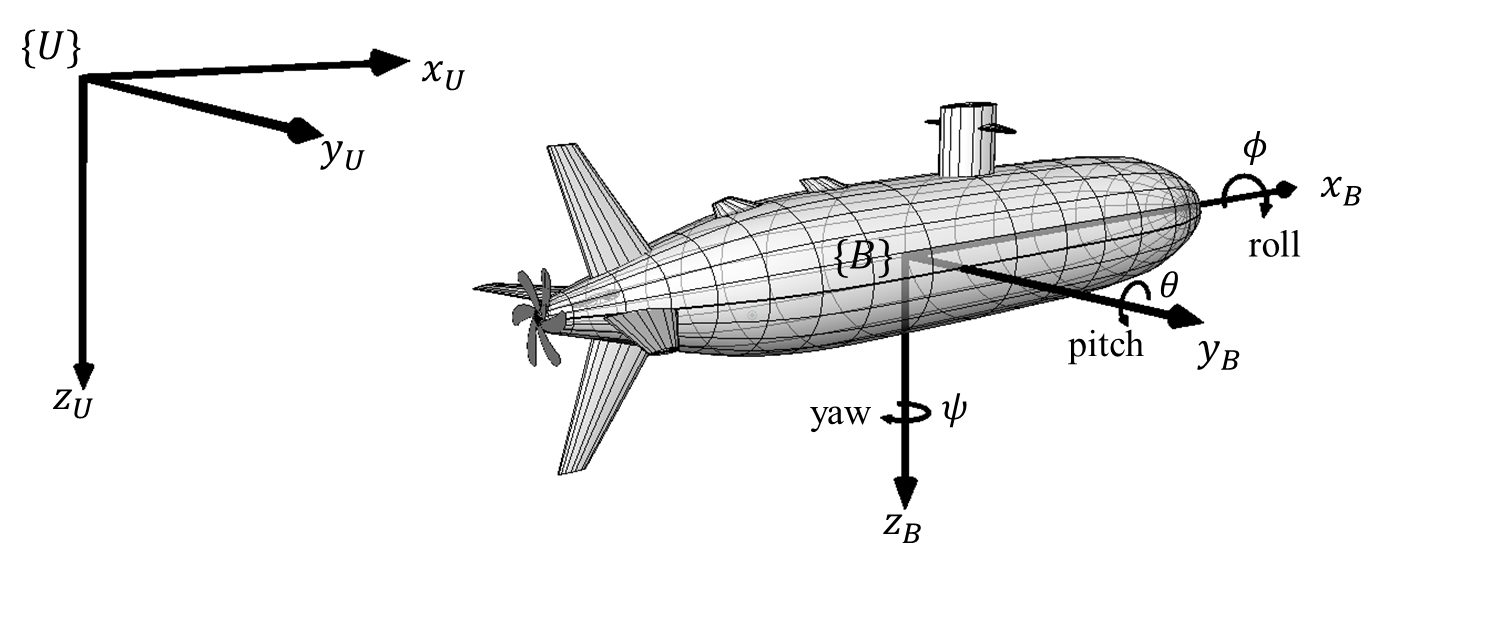

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

\begin{align*}
&\dot x =  
    \begin{pmatrix}
        \dot z \\
        \dot w \\
        \dot \theta \\
    \end{pmatrix} \\
&A = \begin{pmatrix}
        \frac{\partial \dot z}{\partial z} & \frac{\partial \dot z}{\partial w} & \frac{\partial \dot z}{\partial \theta} \\
        \frac{\partial \dot w}{\partial z} & \frac{\partial \dot w}{\partial w} & \frac{\partial \dot w}{\partial \theta} \\ 
        \frac{\partial \dot \theta}{\partial z} & \frac{\partial \dot \theta}{\partial w} & \frac{\partial \dot \theta}{\partial \theta} \\  
    \end{pmatrix}
     , B = \begin{pmatrix}
                \frac{\partial \dot z}{\partial u} \\
                \frac{\partial \dot w}{\partial u} \\ 
                \frac{\partial \dot \theta}{\partial u} \\
            \end{pmatrix}
    , C = \begin{pmatrix}
                \frac{\partial y}{\partial z} & \frac{\partial y}{\partial w} & \frac{\partial y}{\partial \theta} \\
           \end{pmatrix} \\ \\
    &\begin{cases}
        \dot x &= \begin{pmatrix}
                0 & 1 & -vd \\
                0 & d_1 & 0 \\ 
                0 & 0 & 0 \\  
            \end{pmatrix} x +
                    \begin{pmatrix}
                        0 \\
                        \bar m v_d \\ 
                        1 \\
                    \end{pmatrix} u \\
            y &= \begin{pmatrix}
                        1 & 0 & 0 \\
                \end{pmatrix} x
    \end{cases}\\
\end{align*}

**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

\begin{align*}
    &\begin{cases}
        \dot x &= \begin{pmatrix}
                0 & 1 & -vd \\
                0 & d_1 & 0 \\ 
                0 & 0 & 0 \\  
            \end{pmatrix} x +
                    \begin{pmatrix}
                        0 \\
                        \bar m v_d \\ 
                        1 \\
                    \end{pmatrix} u \\
            y &= \begin{pmatrix}
                        1 & 0 & 0 \\
                \end{pmatrix} x
    \end{cases}\\ \\

    & For:  v_d = 1, d_1 = -3 \\
    det(A - \lambda I&) = 0 \Leftrightarrow -\lambda (-3 - \lambda) -\lambda = 0 \\ 
        &\Rightarrow \lambda = 
                \begin{pmatrix}
                        \lambda_1 = 0 \\
                        \lambda_2 = -3 \\
                        \lambda_3 = 0 \\
                \end{pmatrix}
\end{align*}



$\bf{R:}$ Therefore, as there is no positive eigenvalue and eigenvalues equals to 0, by the Lyapunov's Indirect Method <br>we cannot infer anything about the stability of the system.

**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

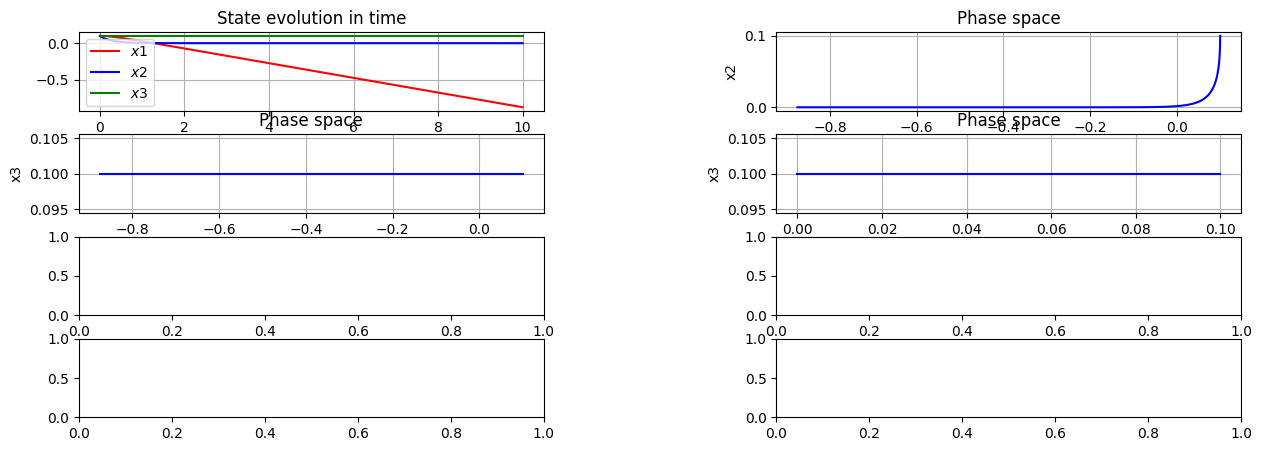

In [3]:
import numpy as np
from scipy import integrate

# parameters
vd=1
d1=-3
d2=-12
m=0.9
q=0
params = [vd, d1, d2, m]

# vector field
def Sys_non(z, t):
  x1, x2, x3  = z[0]-1, z[1], z[2]
  dx1 = -vd*np.tan(x3)+x2/np.cos(x3)
  dx2 = d1*x2+d2*x2*np.abs(x2)+m*(vd/np.cos(x3)-x2*np.tan(x3))*q
  dx3 = q
  return [dx1, dx2, dx3]

def Sys_lin(z, t):
  A = np.array([[0, 1, -vd],
                [0, d1, 0],
                [0, 0, 0]
                ])
  
  B = np.array([[0],
                [m*vd],
                [1]
                ])
  
  return A@z + B@[q]

# generate 1000 linearly spaced numbers for t from 0 to 50
t_end = 10
t = np.linspace(0, t_end, 1000)

# initial values
z0 = [0.1, 0.1, 0.1]

x, infodict = integrate.odeint(Sys_non, z0, t, full_output=True)

# z, infodict2 = integrate.odeint(Sys_lin, z0, t, full_output=True)

x1, x2, x3 = x.T

# z1, z2, z3 = z.T

# sol = odeint(system, z0, t)
# x, y = sol[:, 0], sol[:, 1]

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax11 = fig.add_subplot(2,2,1)
ax21 = fig.add_subplot(2,2,2)
ax31 = fig.add_subplot(2,2,3)
ax41 = fig.add_subplot(2,2,4)

fig2 = plt.figure(figsize=(15,5))
fig2.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax12 = fig2.add_subplot(2,2,1)
ax22 = fig2.add_subplot(2,2,2)
ax32 = fig2.add_subplot(2,2,3)
ax42 = fig2.add_subplot(2,2,4)

ax11.plot(t, x1, 'r-', label='$x1$')
ax11.plot(t, x2, 'b-', label='$x2$')
ax11.plot(t, x3, 'g-', label='$x3$')
ax11.set_title("State evolution in time")
ax11.set_xlabel("time")
ax11.grid()
ax11.legend(loc='best')

ax21.plot(x1, x2, color="blue")
ax21.set_xlabel("x1")
ax21.set_ylabel("x2")
ax21.set_title("Phase space")
ax21.grid()

ax31.plot(x1, x3, color="blue")
ax31.set_xlabel("x1")
ax31.set_ylabel("x3")
ax31.set_title("Phase space")
ax31.grid()

ax41.plot(x2, x3, color="blue")
ax41.set_xlabel("x2")
ax41.set_ylabel("x3")
ax41.set_title("Phase space")
ax41.grid()

# ax12.plot(t, z1, 'r-', label='$z1$')
# ax12.plot(t, z2, 'b-', label='$z2$')
# ax12.plot(t, z3, 'g-', label='$z3$')
# ax12.set_title("State evolution in time")
# ax12.set_xlabel("time")
# ax12.grid()
# ax12.legend(loc='best')

# ax22.plot(z1, z2, color="blue")
# ax22.set_xlabel("z1")
# ax22.set_ylabel("z2")
# ax22.set_title("Phase space")
# ax22.grid()

# ax32.plot(z1, z3, color="blue")
# ax32.set_xlabel("z1")
# ax32.set_ylabel("z3")
# ax32.set_title("Phase space")
# ax32.grid()

# ax42.plot(z2, z3, color="blue")
# ax42.set_xlabel("z2")
# ax42.set_ylabel("z3")
# ax42.set_title("Phase space")
# ax42.grid()

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. \\
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.